In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from nltk import word_tokenize
import joblib

In [3]:
tqdm.pandas()

In [4]:
data = pd.read_csv('datasets/Mobile_laptop_labelled.csv')
data.dropna(inplace=True)

In [5]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    try:
        clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
        return clean_HTML
    except: 
        return raw_text

In [6]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [7]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return(" ".join(clean_LowerCase))

In [8]:
from nltk.stem import WordNetLemmatizer
def get_wordnet_pos(tag):
    from nltk.corpus import wordnet
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else: 
        return wordnet.NOUN

In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatize(sentance):
    from nltk.tag import pos_tag
    tagged = pos_tag( [i for i in sentance if i])
    lemmatized = []
    for word, tag in tagged:
        lemma = lemmatizer.lemmatize(word, pos = get_wordnet_pos(tag))
        lemmatized.append(lemma)
    return lemmatized

In [10]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return words

In [15]:
def customTokenizer(text):
    text = removeHTML(text)
    text = removeSpecialChar(text)
    text = toLowerCase(text)
    tokens = word_tokenize(text)
    tokens = removeStopWords(tokens)
    tokens = lemmatize(tokens)
    return tokens

In [12]:
X = data['text']
Y = data['polarity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [16]:
tvec = TfidfVectorizer(use_idf=True,strip_accents='ascii',tokenizer=customTokenizer)


X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [17]:
joblib.dump(tvec, "final_model_version_corrected/TVEC.joblib")

['final_model_version_corrected/TVEC.joblib']

In [18]:
# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train_tvec, Y_train)

LinearSVC(dual=False)

In [19]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
svr_lin_predictions = svr_lin.predict(X_test_tvec)
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.810000,0.870000,0.840000,13841.000000
1,0.810000,0.210000,0.330000,4257.000000
2,0.930000,0.970000,0.950000,49334.000000
accuracy,0.900000,0.900000,0.900000,0.900000
macro avg,0.850000,0.680000,0.710000,67432.000000
weighted avg,0.900000,0.900000,0.890000,67432.000000


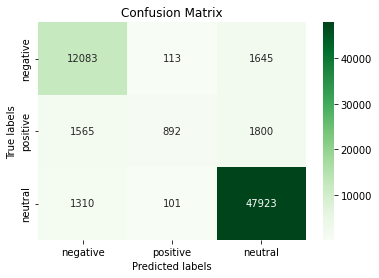

In [21]:
# confusion matrix
# svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive', 'neutral']); ax.yaxis.set_ticklabels(['negative', 'positive', 'neutral']);

In [22]:
# to save the model
import joblib
joblib.dump(svr_lin, "final_model_version_corrected/SVM.joblib")

['final_model_version_corrected/SVM.joblib']

In [23]:
# Random Forest model
random_forest = RandomForestClassifier(verbose=True)
random_forest.fit(X_train_tvec, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 31.7min finished


RandomForestClassifier(verbose=True)

In [24]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
ranfrst_predictions = random_forest.predict(X_test_tvec)
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.0s finished


,precision,recall,f1-score,support
0,0.920000,0.890000,0.910000,13841.000000
1,0.980000,0.610000,0.750000,4257.000000
2,0.950000,0.990000,0.970000,49334.000000
accuracy,0.950000,0.950000,0.950000,0.950000
macro avg,0.950000,0.830000,0.880000,67432.000000
weighted avg,0.950000,0.950000,0.940000,67432.000000


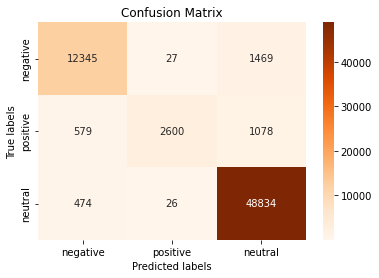

In [25]:
# confusion matrix
# ranfrst_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive', 'neutral']); ax.yaxis.set_ticklabels(['negative', 'positive', 'neutral']);

In [26]:
# to save the model
import joblib
joblib.dump(random_forest, "final_model_version_corrected/RF.joblib")

['final_model_version_corrected/RF.joblib']

In [27]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# to save the model
import joblib
joblib.dump(lr, "final_model_version_corrected/LR.joblib")

['final_model_version_corrected/LR.joblib']

In [29]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lr.predict(X_test_tvec)
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)



,precision,recall,f1-score,support
0,0.800000,0.860000,0.830000,13841.000000
1,0.640000,0.140000,0.230000,4257.000000
2,0.930000,0.970000,0.950000,49334.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.790000,0.650000,0.670000,67432.000000
weighted avg,0.880000,0.890000,0.880000,67432.000000


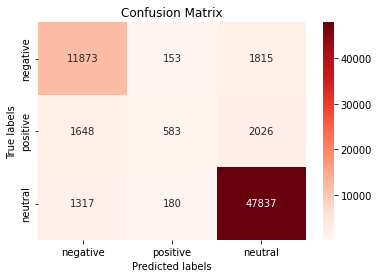

In [30]:
# confusion matrix
# lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive', 'neutral']); ax.yaxis.set_ticklabels(['negative', 'positive', 'neutral']);


In [31]:
# Naive Bayes model
nbm = naive_bayes.MultinomialNB()
nbm.fit(X_train_tvec, Y_train)

MultinomialNB()

In [32]:
joblib.dump(nbm, "final_model_version_corrected/NBC.joblib")

['final_model_version_corrected/NBC.joblib']

In [33]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
nbm_predictions = nbm.predict(X_test_tvec)
report = classification_report(Y_test,nbm_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("blue", as_cmap=True)
data_report.style.background_gradient(cmap=cm)



,precision,recall,f1-score,support
0,0.850000,0.570000,0.680000,13841.000000
1,0.660000,0.020000,0.030000,4257.000000
2,0.840000,0.990000,0.910000,49334.000000
accuracy,0.840000,0.840000,0.840000,0.840000
macro avg,0.780000,0.520000,0.540000,67432.000000
weighted avg,0.830000,0.840000,0.810000,67432.000000


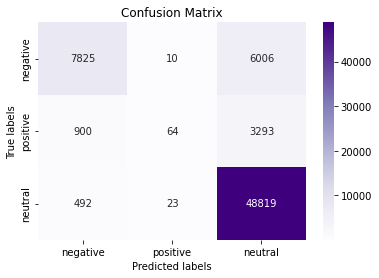

In [34]:
# confusion matrix
# nbm_predictions=nbm.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,nbm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive', 'neutral']); ax.yaxis.set_ticklabels(['negative', 'positive', 'neutral']);


In [45]:
df_new  = pd.read_csv("datasets/onePRODUCT.csv").dropna().reset_index()
if 'level_0' in df_new.columns:
    df_new.drop(['level_0'], axis=1, inplace=True)
if 'index' in df_new.columns:
    df_new.drop(['index'], axis=1, inplace=True)
df_new.columns = ['text', 'helpful']
df_new.head()

,text,helpful
0,good buy,0.0
1,great phonegood price,0.0
2,I bought and send to Africa the two are not wo...,0.0
3,Had difficulty connecting to wf,0.0
4,very good,0.0


In [46]:
def getOverallSentiment(df:pd.DataFrame):
    df['helpful'].fillna(0, inplace=True)
    data = tvec.transform(df['text'])
    df['sentiment'] = svr_lin.predict(data)
    df['helpful'] = df['helpful'].apply(lambda n: n+1)
    sum = df['helpful'].sum()

    result = {
        0: 0,
        1: 0,
        2: 0
    }


    for index, sentiment  in enumerate(df['sentiment']):
        result[sentiment] += df['helpful'][index]

    score = -1 * result[0] + 1*result[2]
        
    print(score, sum, result)
    if result[0] > result[1] and result[0] > result[2]:
        return 0,score
    elif result[1] > result[0] and result[1] > result[2]:
        return 1,score
    else: 
        return 2,score
    # return result

In [47]:
getOverallSentiment(df_new)

-407.0 3556.0 {0: 1956.0, 1: 51.0, 2: 1549.0}


(0, -407.0)